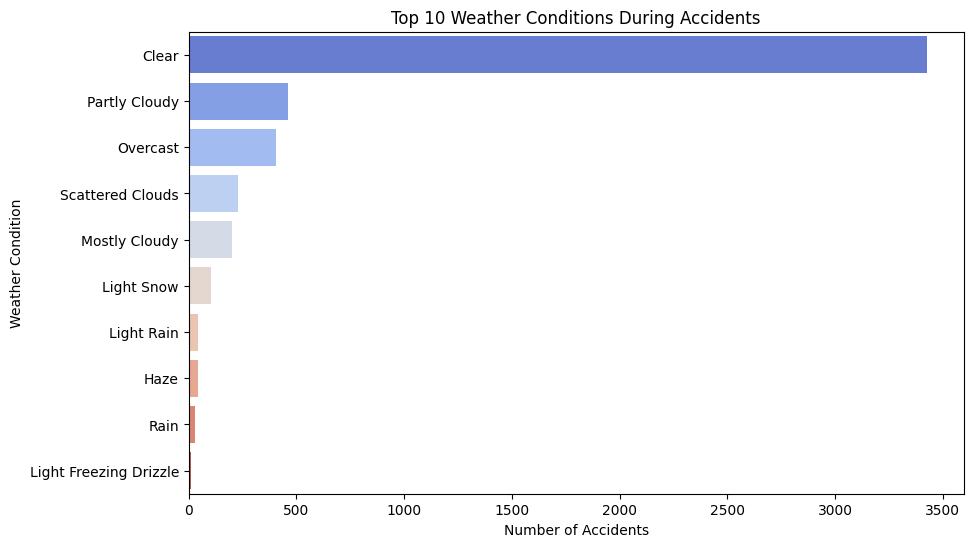

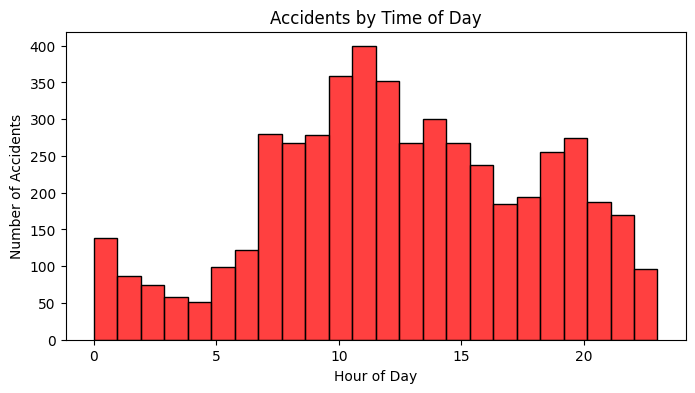

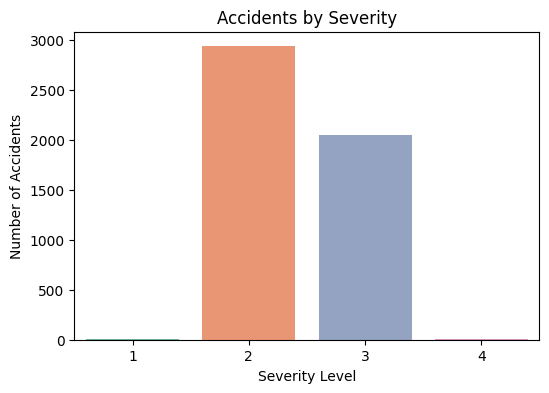

✅ Accident Hotspots map saved as accident_hotspots.html


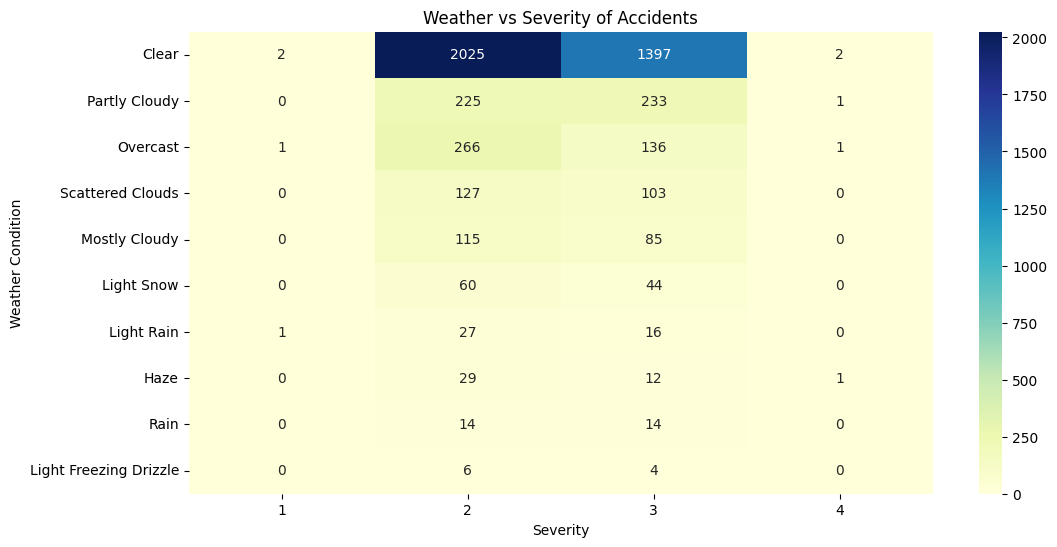

In [11]:
# 🚦 Traffic Accident Data Analysis and Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

#Load Dataset
# since the US_Accidents_March2023 is too big i took a sample from it consisting of 100k rows and saved it as US_Accidents_sample.csv

# Read a small chunk of the full CSV
df_sample = pd.read_csv("US_Accidents_March2023.csv", nrows=5000)

# Save as sample CSV for GitHub (<25MB)
df_sample.to_csv("US_Accidents_sample.csv", index=False)
df = pd.read_csv("US_Accidents_sample.csv")

#Preprocessing
# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract accident hour
df['Hour'] = df['Start_Time'].dt.hour

# Drop rows without lat/long
df = df.dropna(subset=['Start_Lat', 'Start_Lng'])

# Accidents by Weather
plt.figure(figsize=(10, 6))
top_weather = df['Weather_Condition'].value_counts().head(10)   # top 10 weather types
sns.barplot(
    y=top_weather.index,
    x=top_weather.values,
    hue=top_weather.index,    # avoid deprecation warnings
    palette="coolwarm",
    legend=False
)
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

#Accidents by Time of Day
plt.figure(figsize=(8, 4))
sns.histplot(df['Hour'], bins=24, color="red")
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

#Accidents by Severity
plt.figure(figsize=(6, 4))
sns.countplot(
    x="Severity",
    data=df,
    hue="Severity", # fix warning
    palette="Set2",
    legend=False
)
plt.title("Accidents by Severity")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()

# Accident Hotspots
m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)
heat_data = list(zip(df['Start_Lat'], df['Start_Lng']))
HeatMap(heat_data[:5000], radius=8).add_to(m)  # use 5000 points for speed
m.save("accident_hotspots.html")
print("✅ Accident Hotspots map saved as accident_hotspots.html")

#Weather vs Severity Heatmap
plt.figure(figsize=(12, 6))
crosstab = pd.crosstab(df['Weather_Condition'], df['Severity'])

# Keep only top 10 weather conditions
top_weather_conditions = df['Weather_Condition'].value_counts().head(10).index
crosstab = crosstab.loc[top_weather_conditions]

sns.heatmap(crosstab, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Weather vs Severity of Accidents")
plt.xlabel("Severity")
plt.ylabel("Weather Condition")
plt.show()
